In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

from sage.xai.load_plots import load_imgs, create_title
from sage.xai.utils import top_q
from sage.xai.nilearn_plots import plot_brain, plot_glass_brain, plot_overlay

In [9]:
mask_path = "assets/weights/resnet10t-aug/no-mask/ig-total/attrs.npy"
mask_path = "assets/weights/resnet10t-aug/no-mask/ig-indiv-k0.99/attrs.npy"
mask = np.load(mask_path)

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fbf13b37fd0>,
 None)

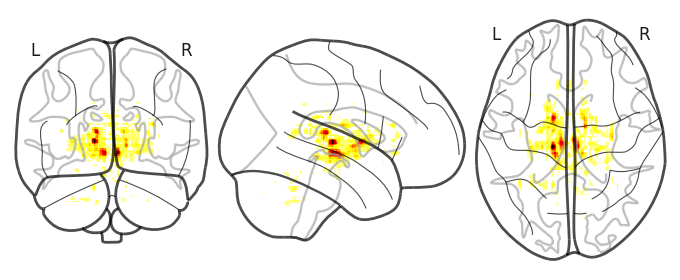

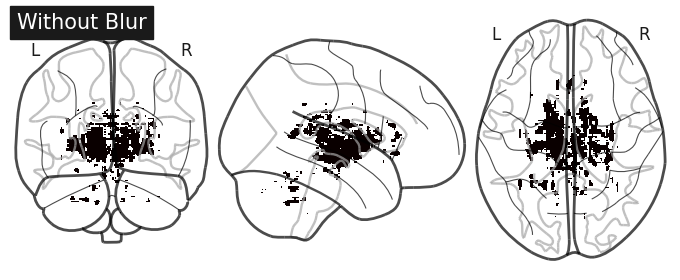

In [17]:
top = top_q(mask, q=0.995, return_bool=False)
plot_glass_brain(top)

bool_top = ~np.isnan(top) & (top > 0)
bool_top = bool_top.astype(np.int32)
plot_glass_brain(bool_top, title="Without Blur")

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fbf166b3bb0>,
 None)

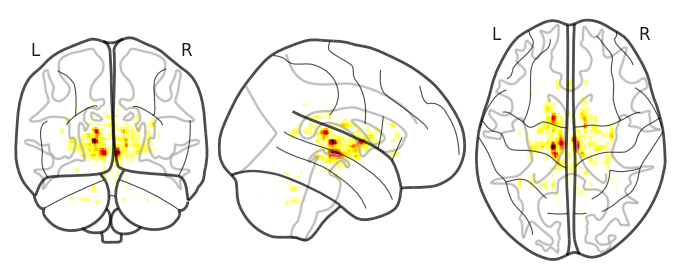

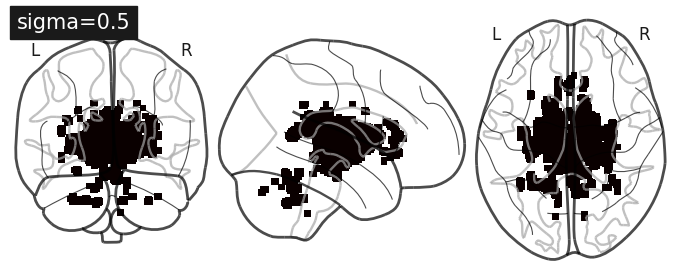

In [18]:
sigma = 0.5

blur = gaussian_filter(input=top, sigma=sigma)
plot_glass_brain(blur)

bool_blur = ~np.isnan(blur) & (blur > 0)
bool_blur = bool_blur.astype(np.int32)
plot_glass_brain(bool_blur, title=f"sigma={sigma}")

In [20]:
np.save(file=f"assets/masks/resnet10t-aug-nomask-ig0.99-0.995-sigma{sigma}.npy", arr=bool_blur)

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fbf138d3160>,
 None)

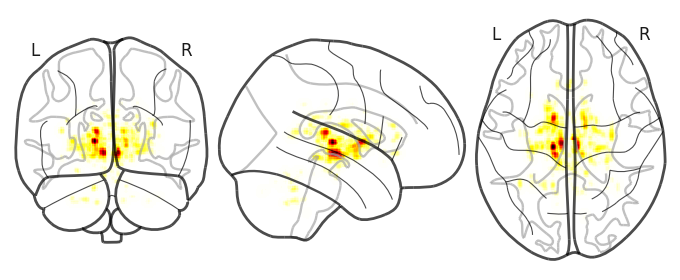

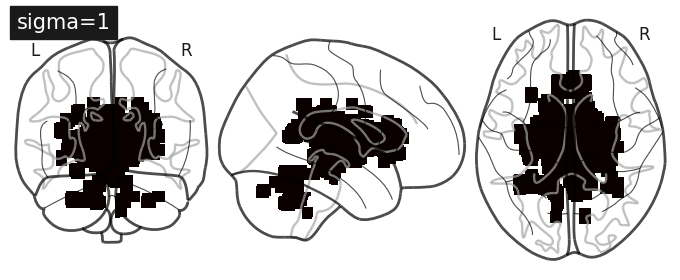

In [13]:
sigma = 1

blur = gaussian_filter(input=top, sigma=sigma)
plot_glass_brain(blur)

bool_blur = ~np.isnan(blur) & (blur > 0)
bool_blur = bool_blur.astype(np.int32)
plot_glass_brain(bool_blur, title=f"sigma={sigma}")

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fbf0c652710>,
 None)

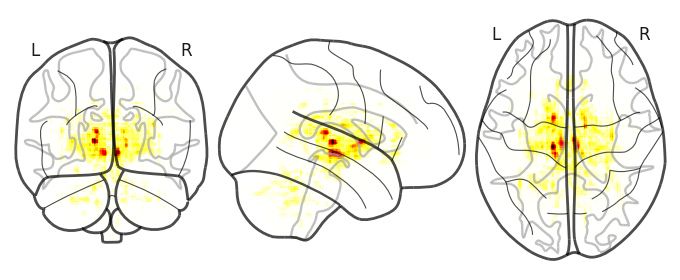

In [12]:
plot_glass_brain(mask)

In [36]:
def get_stacked_img(path: list = ["resnet10t-mask", "resnet10t-naive"],
                    method: str = "ig",
                    indiv: bool = False,
                    mask: bool = True):

    img_dict = dict(path=path, method=method, indiv=indiv, mask=mask)

    imgs = load_imgs(**img_dict)
    num_img = len(imgs)
    print(imgs)
    fig, ax = plt.subplots(nrows=num_img, figsize=(12, 4 * num_img))
    
    method = img_dict.get("method")
    indiv = img_dict.get("indiv")
    mask: bool = img_dict.get("mask")
    mask = f"Infer {'w/' if mask else 'w/o'} Mask"
    title = f"{mask} | XAI Method={method}"
    fig.suptitle(title, size="x-large")
    for idx, (img, path) in enumerate(zip(imgs, img_dict["path"])):
        img = Image.open(img)
        _ax = ax[idx]
        
        _ax.imshow(img)
        _ax.tick_params(left=False, right=False, bottom=False,
                            labelleft=False, labelbottom=False)
        # title = create_title(path=path, img_dict=img_dict)
        _ax.set_title(path)
        _ax.grid(visible=False)
    fig.tight_layout()

[PosixPath('assets/weights/resnet10t-mask/mask/gbp-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/mask/gbp-total/glass.png')]


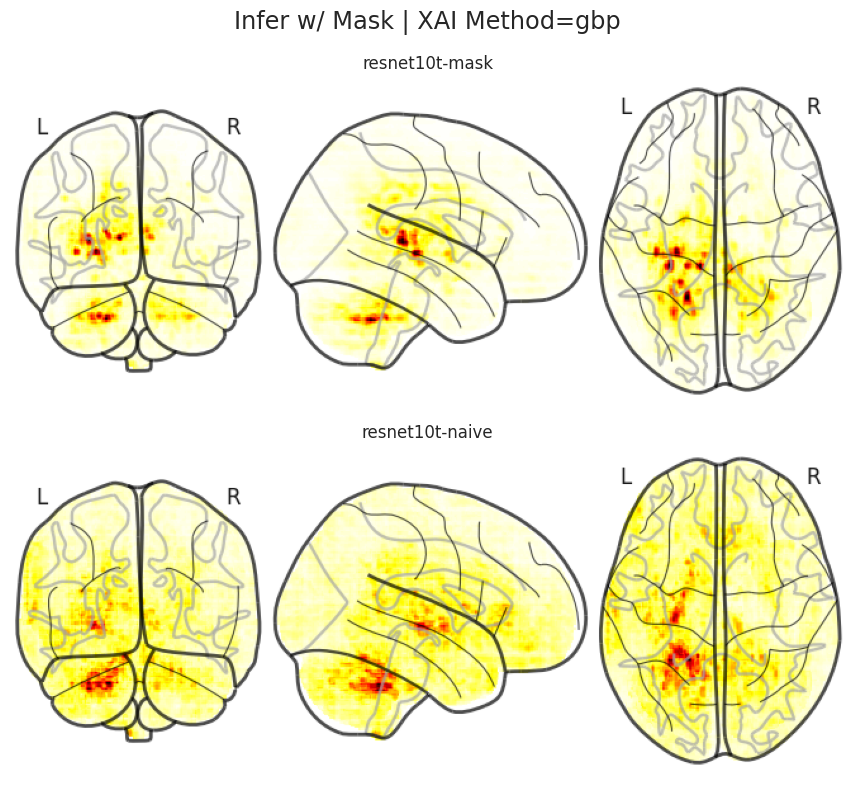

In [41]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"][:2],
                method="gbp",
                indiv=False, mask=True)

[PosixPath('assets/weights/resnet10t-mask/no-mask/gbp-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/no-mask/gbp-total/glass.png')]


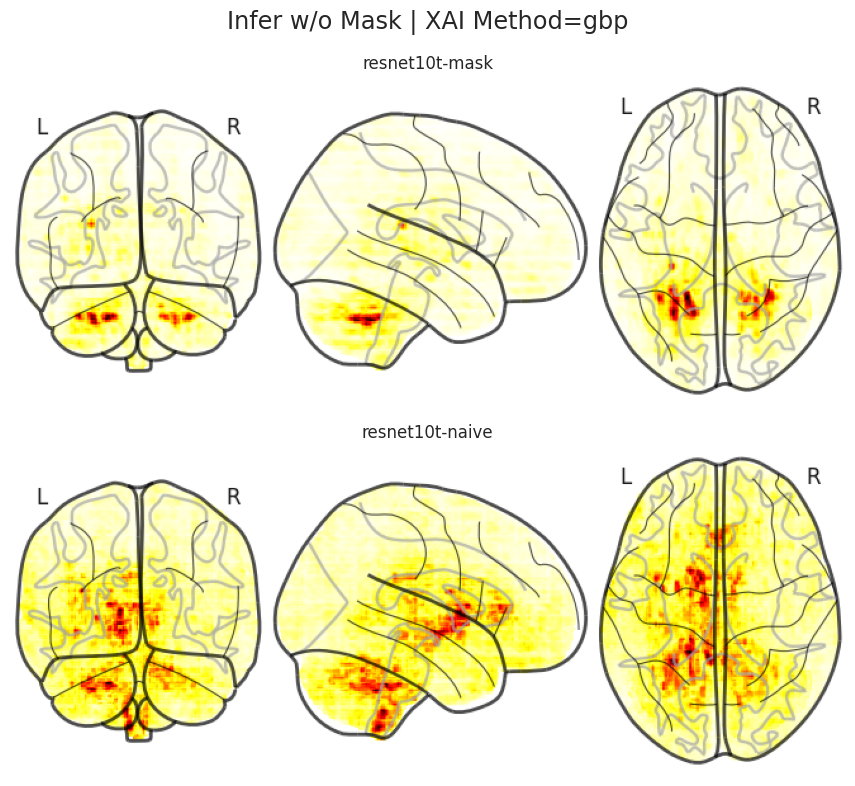

In [42]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"][:2],
                method="gbp",
                indiv=False, mask=False)

[PosixPath('assets/weights/resnet10t-mask/mask/ig-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/mask/ig-total/glass.png')]


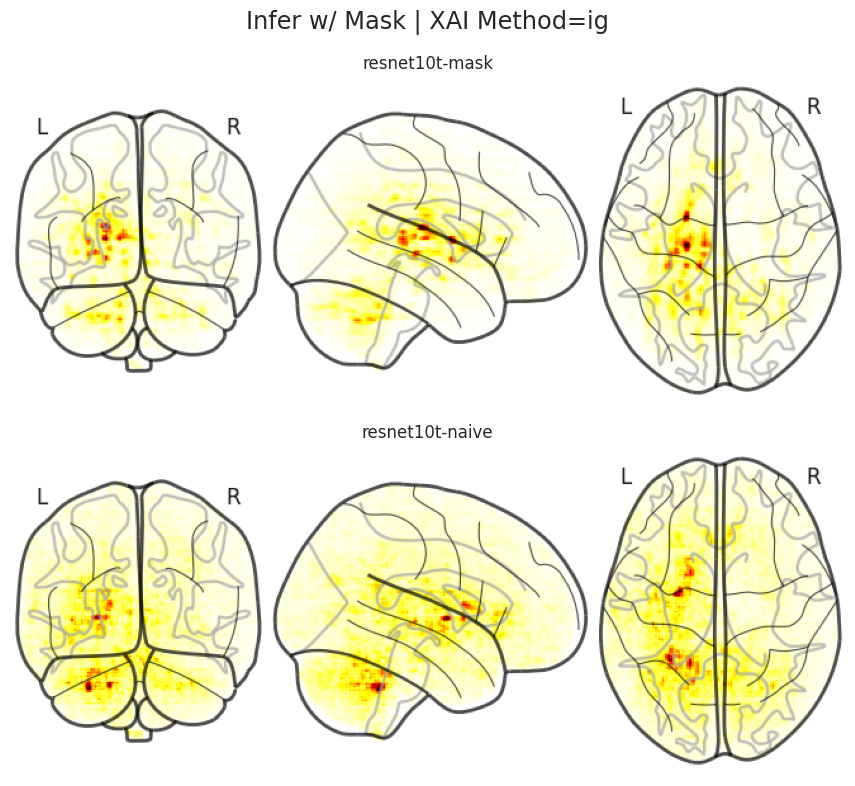

In [39]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"],
                method="ig",
                indiv=False, mask=True)

[PosixPath('assets/weights/resnet10t-mask/no-mask/ig-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/no-mask/ig-total/glass.png')]


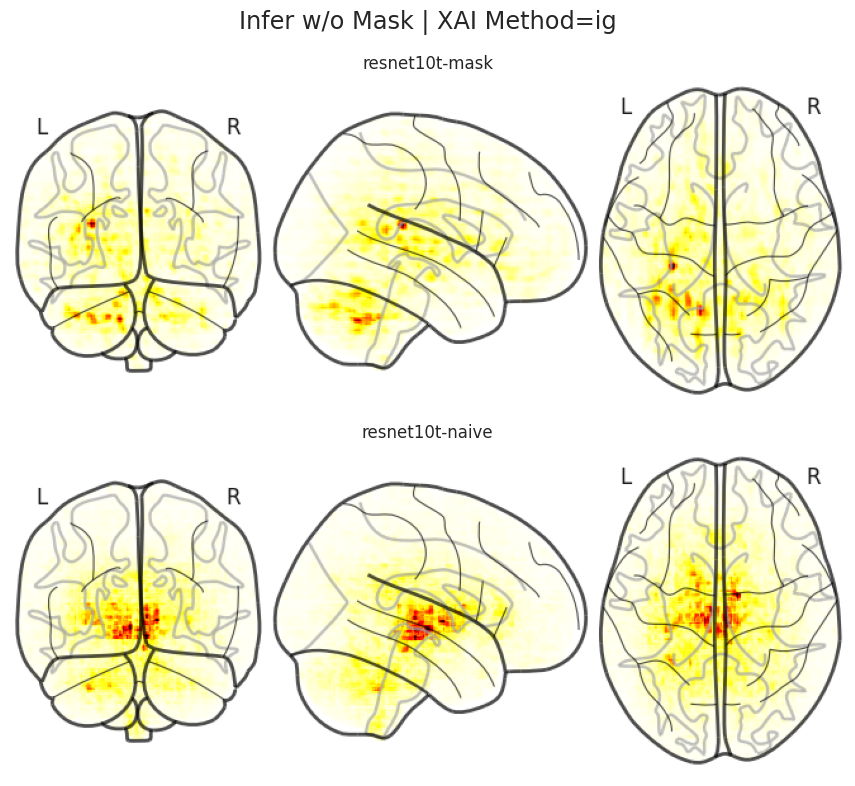

In [40]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"],
                method="ig",
                indiv=False, mask=False)